<a href="https://colab.research.google.com/github/teukumhfs/TransJakartaPassenger-RevenueAnalysis/blob/main/Transjakarta_Passenger_and_Revenue_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TransJakarta Passenger and Revenue Analysis
**Unveiling Passenger and Revenue Performance (2019-2021)**

TransJakarta, with 13 BRT corridors, 260 stops, and a 251.2 km track, is a vital part of Jakarta's transportation system.

In today's urban environment, data-driven insights are crucial for refining public transit and enriching commuter experiences. This project focuses on analyzing TransJakarta's performance. As a vital component of Jakarta's transportation network, TransJakarta operates 13 BRT corridors, several additional routes, 260 stops, and covers a track spanning 251.2 km.

Focusing on passenger ridership and revenue. Using thorough data processing, analysis, and aim to reveal patterns, trends, and correlations within the data.

This analysis offers insights for understanding passenger behavior and revenue patterns within TransJakarta's system. Through data-driven exploration and compelling visualizations, this project serves as a catalyst for the continual refinement and enhancement of TransJakarta's urban transportation network.


In [1]:
# @title Import requirements
import numpy as np
import pandas as pd
import requests
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as bs

In [2]:
# @title Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Collection
The data presented for Transjakarta is meticulously collected from the official BPS website (https://www.bps.go.id). It comprises comprehensive tables detailing the **corridors, revenue, and passenger** statistics, which are further analyzed to gain valuable insights. To ensure seamless data processing and easy accessibility, all this valuable information is securely stored on Google Drive.

In [3]:
# @title Setup DataFrame paths
path1 = '/content/drive/MyDrive/dataset/transjakarta/koridor.csv'
path2 = '/content/drive/MyDrive/dataset/transjakarta/pendapatan.csv'
path3 = '/content/drive/MyDrive/dataset/transjakarta/penumpang.csv'

df_corridor = pd.read_csv(path1)
df_revenue = pd.read_csv(path2)
df_passenger = pd.read_csv(path3)

# Corridor
Here is the recapitulated corridor data, comprising two attributes: **id_koridor (corridor id), and rute (route)**.

In [4]:
# @title Corridor Data
print("Corridor")
df_corridor.tail()

Corridor


,id_koridor,rute
14,LBPR,Royaltrans
15,LPM,Mikrotrans
16,LTRS,Transjabodetabek
17,LBW,Layanan Bus Wisata
18,LX,Lainnya


In [5]:
df_corridor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_koridor  19 non-null     object
 1   rute        19 non-null     object
dtypes: object(2)
memory usage: 432.0+ bytes


Based on the information above, there are 19 corridors that will be analysed. The LX corridor id (other routes) comprises: rute khusus (special route), rumah susun (flats), and gratis (free route). Each corridor has two important attributes contain passenger and revenue. The two attributes will be analysed in the next step.

# Passenger
The passenger data also consists of four attributes: **id_koridor (corridor id), rute (route), pendapatan (revenue), and tahun (year)**

In [6]:
# @title Passenger Data
print("Passenger")
df_passenger.head()

Passenger


,id_koridor,rute,penumpang,tahun
0,1,Blok M-Kota,28703262,2019
1,2,Pulo Gadung-Harmoni,9569953,2019
2,3,Kalideres-Pasar Baru,12809507,2019
3,4,Pulo Gadung 2-Dukuh Atas,9221017,2019
4,5,Kp. Melayu-Ancol,12329691,2019


In [7]:
df_passenger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_koridor  57 non-null     object
 1   rute        57 non-null     object
 2   penumpang   57 non-null     int64 
 3   tahun       57 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.9+ KB


In [8]:
min_sample_passenger = df_passenger.groupby('tahun').apply(lambda x: x.nsmallest(5, 'penumpang')).reset_index(drop=True)
max_sample_passenger = df_passenger.groupby('tahun').apply(lambda x: x.nlargest(5, 'penumpang')).reset_index(drop=True)

print("Minimum each year\n")
print(min_sample_passenger)

print("\n\nMaximum each year\n")
print(max_sample_passenger)

Minimum each year

   id_koridor                       rute  penumpang  tahun
0          LX                    Lainnya     343124   2019
1        LBPR                 Royaltrans    1166631   2019
2         LBW         Layanan Bus Wisata    2587362   2019
3          12  Penjaringan-Tanjung Priok    3012110   2019
4          11     Kp. Melayu-Pulo Gebang    3875702   2019
5        LBPR                 Royaltrans       1445   2020
6          LX                    Lainnya     143637   2020
7         LBW         Layanan Bus Wisata     405426   2020
8          12  Penjaringan-Tanjung Priok    1898532   2020
9          11     Kp. Melayu-Pulo Gebang    2040909   2020
10        LBP      Layanan Bus Pengumpan          0   2021
11        LBW         Layanan Bus Wisata          0   2021
12       LBPR                 Royaltrans     151887   2021
13         LX                    Lainnya     156672   2021
14       LTRS           Transjabodetabek     731419   2021


Maximum each year

   id_koridor   

# Revenue
The revenue data consists of four attributes: **id_koridor (corridor id), rute (route), pendapatan (revenue), and tahun (year)**

In [9]:
# @title Revenue Data
print("Revenue")
df_revenue.head()

Revenue


,id_koridor,rute,pendapatan,tahun
0,1,Blok M-Kota,93950566124,2019
1,2,Pulo Gadung-Harmoni,29913094973,2019
2,3,Kalideres-Pasar Baru,39975278549,2019
3,4,Pulo Gadung 2-Dukuh Atas,29455491234,2019
4,5,Kp. Melayu-Ancol,38144616872,2019


In [10]:
df_revenue_count = len(df_revenue)
print("Total data:", df_revenue_count)

Total data: 57


In [11]:
min_sample_revenue = df_revenue.groupby('tahun').apply(lambda x: x.nsmallest(5, 'pendapatan')).reset_index(drop=True)
max_sample_revenue = df_revenue.groupby('tahun').apply(lambda x: x.nlargest(5, 'pendapatan')).reset_index(drop=True)

print("Minimum each year\n")
print(min_sample_revenue)

print("\n\nMaximum each year\n")
print(max_sample_revenue)

Minimum each year

   id_koridor                       rute   pendapatan  tahun
0         LPM                 Mikrotrans            0   2019
1         LBW         Layanan Bus Wisata            0   2019
2          LX                    Lainnya            0   2019
3          12  Penjaringan-Tanjung Priok   9371415690   2019
4          11     Kp. Melayu-Pulo Gebang  11032062040   2019
5         LPM                 Mikrotrans            0   2020
6         LBW         Layanan Bus Wisata            0   2020
7          LX                    Lainnya            0   2020
8        LBPR                 Royaltrans     28900000   2020
9          11     Kp. Melayu-Pulo Gebang   5865508500   2020
10        LBP      Layanan Bus Pengumpan            0   2021
11        LPM                 Mikrotrans            0   2021
12        LBW         Layanan Bus Wisata            0   2021
13         LX                    Lainnya    104922500   2021
14       LTRS           Transjabodetabek   2255691008   2021


Max

# Summary Statistics
Here is the statistic summary of passengers and revenue. The summary will be done with `.describe()` function.

In [12]:
# @title Summary - Passenger
modified_df_passenger = df_passenger['penumpang'].copy()
modified_df_passenger.describe()

count    5.700000e+01
mean     8.592296e+06
std      1.121950e+07
min      0.000000e+00
25%      2.587362e+06
50%      4.785602e+06
75%      9.960874e+06
max      4.768247e+07
Name: penumpang, dtype: float64

The explaination:

1. `mean`: The average number of passengers is approximately 8.6 million, and the data spans across the year 2020.

2. `std`: The passenger has a standard deviation of approximately 11.2 million, indicating variability in passenger counts. 0.82, which is representing 2019, 2020, and 2021.

3. `min`: The smallest number of passengers recorded is 0, and the earliest year of the dataset is 2019.

5. `25%`: 25% (Q1) of the passenger counts are below approximately 2.6 million, and 25% of the data is from 2019.

6. `50%`: 50% (Q2) or The median number of passengers is below approximately 4.8 million, and the median data from 2020.

7. `75%`: 75% (Q3) of the passenger counts are below approximately 10 million, and 75% of the data is from 2021.

8. `max`: The highest number of passengers recorded is approximately 47.7 million, and the latest year of the dataset is 2021.

In [15]:
# @title Summary - Revenue
modified_df_revenue = df_revenue['pendapatan'].copy()
modified_df_revenue.describe()

count    5.700000e+01
mean     1.977484e+10
std      2.262799e+10
min      0.000000e+00
25%      4.698686e+09
50%      1.365205e+10
75%      2.951675e+10
max      1.269471e+11
Name: pendapatan, dtype: float64

The explaination:

1. `Mean`: The average revenue across all corridors and years is approximately 19.77 billion Rupiah.

2. Standard Deviation (`Std`): The revenue values vary around the mean, with a standard deviation of approximately 22.63 billion Rupiah.

3. Minimum (`Min`): The smallest revenue value in the dataset is 0 Rupiah, indicating that some corridors had no revenue during specific years.

4. `25%`(Q1): 25th Percentile of the revenue values are less than or equal to approximately 4.70 billion Rupiah.

5. `50%`(Q2):: The median revenue value is approximately 13.65 billion Rupiah. This is the middle value when all revenue values are sorted in ascending order.

6. `75%`(Q3): 75th Percentile of the revenue values are less than or equal to approximately 29.52 billion Rupiah.

7. Maximum (`Max`): The largest revenue value in the dataset is approximately 126.95 billion Rupiah, indicating the highest revenue generated by a corridor during the specified years.

# Visualization Seaborn
Here is the visualization of passenger and revenue. The visualization is performed with seaborn.barplot and matplotlib pie chart.

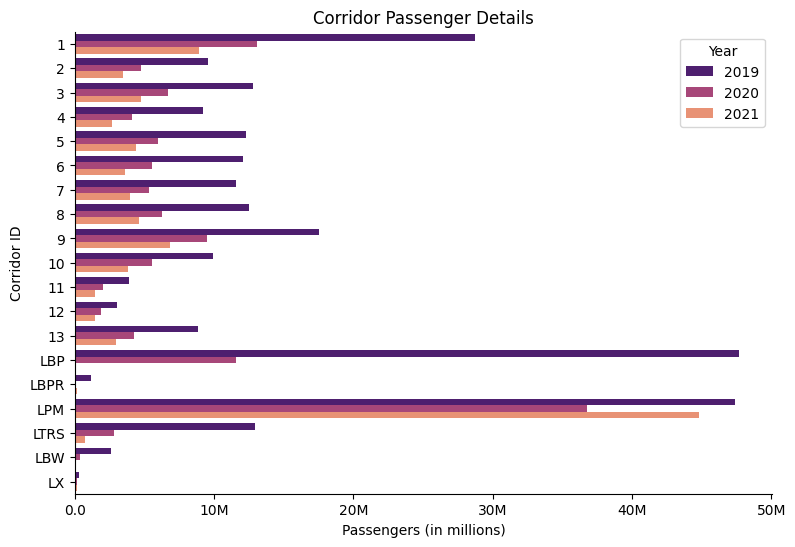

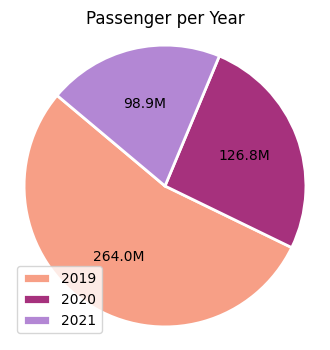

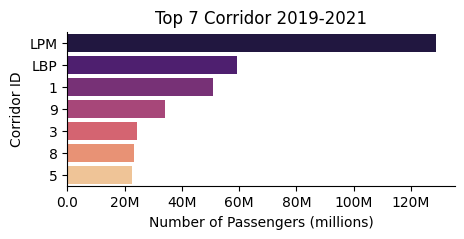

In [14]:
# @title Passenger Visualization
from matplotlib.ticker import FuncFormatter

# Function to format y-axis labels
def format_labels(value, _):
    if value >= 1e9:
        return f'{value // 1e9:.0f}B'
    elif value >= 1e6:
        return f'{value // 1e6:.0f}M'
    else:
        return str(value)

# Corridor passenger details per year

# Create the bar plot using seaborn
plt.figure(figsize=(9, 6))
sns.barplot(data=df_passenger, x='penumpang', y='id_koridor', hue='tahun', palette='magma', errwidth=0)
plt.xlabel('Passengers (in millions)')
plt.ylabel('Corridor ID')
plt.title('Corridor Passenger Details')
plt.legend(title='Year')

# Format y-axis labels
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_labels))

sns.despine()
plt.show()

# Passenger counts by year
passenger_counts = df_passenger.groupby('tahun')['penumpang'].sum().reset_index()

def format_passenger_value(value):
    if value >= 1e9:
        return '{:.1f}B'.format(value / 1e9)
    elif value >= 1e6:
        return '{:.1f}M'.format(value / 1e6)
    else:
        return '{:.0f}'.format(value)

custom_colors = ['#f79f86', '#a6317d', '#b387d4']

plt.figure(figsize=(4, 4))
plt.pie(passenger_counts['penumpang'], startangle=140, colors=custom_colors,
        wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
        autopct= lambda x: format_passenger_value(x * sum(passenger_counts['penumpang']) / 100))
plt.title('Passenger per Year')
plt.axis('equal') # Equal aspect ratio ensures that the pie chart is circular

plt.legend(labels=passenger_counts['tahun'])
plt.show()


# Top Corridor ID by passenger counts
top7_passenger = df_passenger.groupby('id_koridor')['penumpang'].sum().nlargest(7).reset_index()

plt.figure(figsize=(5, 2))
sns.barplot(data=top7_passenger, x='penumpang', y='id_koridor', palette="magma")
plt.xlabel('Number of Passengers (millions)')
plt.ylabel('Corridor ID')
plt.title('Top 7 Corridor 2019-2021')

# Format x-axis labels
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_labels))

sns.despine()
plt.show()

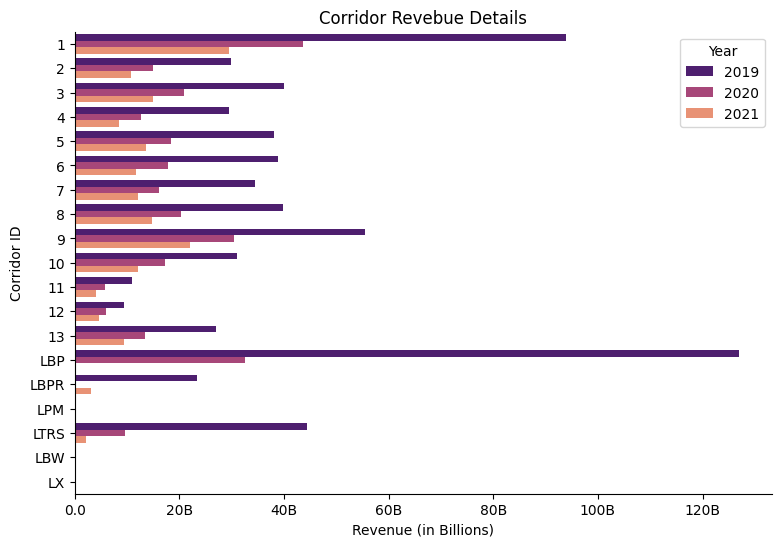

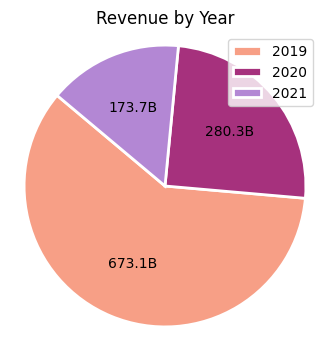

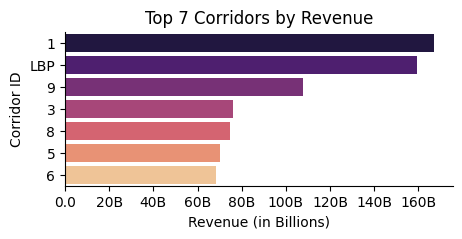

In [16]:
# @title Revenue Analysis
from matplotlib.ticker import FuncFormatter

# Function to format y-axis labels
def format_labels(value, _):
    if value >= 1e9:
        return f'{value // 1e9:.0f}B'
    elif value >= 1e6:
        return f'{value // 1e6:.0f}M'
    else:
        return str(value)

# Revenue details per year
# Create the bar plot using seaborn
plt.figure(figsize=(9, 6))
sns.barplot(data=df_revenue, x='pendapatan', y='id_koridor', hue='tahun', palette='magma', errwidth=0)
plt.xlabel('Revenue (in Billions)')
plt.ylabel('Corridor ID')
plt.title('Corridor Revebue Details')
plt.legend(title='Year')

# Format y-axis labels
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_labels))

sns.despine()
plt.show()

# Passenger counts by year
revenue_counts = df_revenue.groupby('tahun')['pendapatan'].sum().reset_index()

def format_revenue_value(value):
    if value >= 1e9:
        return '{:.1f}B'.format(value / 1e9)
    elif value >= 1e6:
        return '{:.1f}M'.format(value / 1e6)
    else:
        return '{:.0f}'.format(value)

custom_colors = ['#f79f86', '#a6317d', '#b387d4']
plt.figure(figsize=(4, 4))
plt.pie(revenue_counts['pendapatan'], startangle=140, colors=custom_colors,
        wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
        autopct= lambda x: format_revenue_value(x * sum(revenue_counts['pendapatan']) / 100))
plt.title('Revenue by Year')
plt.axis('equal')

plt.legend(labels=revenue_counts['tahun'])
plt.show()

# Top Corridor ID by passenger counts
top7_revenue = df_revenue.groupby('id_koridor')['pendapatan'].sum().nlargest(7).reset_index()

plt.figure(figsize=(5, 2))
sns.barplot(data=top7_revenue, x='pendapatan', y='id_koridor', palette="magma")
plt.xlabel('Revenue (in Billions)')
plt.ylabel('Corridor ID')
plt.title('Top 7 Corridors by Revenue')

# Format x-axis labels
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_labels))

sns.despine()
plt.show()

# Insights

In [17]:
# @title Passenger
print("Top 7 Corridor Passengers 2019-2021")
top7_passenger.head(7)

Top 7 Corridor Passengers 2019-2021


,id_koridor,penumpang
0,LPM,128903883
1,LBP,59273136
2,1,50766287
3,9,33928548
4,3,24280700
5,8,23382381
6,5,22678897


According to the data and visualization above, In 2019, Layanan Bus Pengumpan (LBP) has the highest passengers in transjakarta corridors, while LX is the lowest

In 2021, Layanan Bus Pengumpan (LBP) and Layanan Bus Wisata (LBW) have no passenger 2021

In 2019 has the highest passengers and 2021 is the lowest

in 2020, LPM  has the highest passenger, and Royaltrans (LBPR) hast the lowest

LPM has the highest passengers in total 2019-2021

The analysis of the provided data and visualizations reveals several insightful observations regarding the TransJakarta corridors' passenger trends from 2019 to 2021. These insights offer valuable considerations for policymakers and transit authorities in optimizing public transportation services.

1. **Yearly Ridership Fluctuations:** The data showcases notable fluctuations in passenger numbers across the TransJakarta corridors over the three-year period. While 2019 marked the peak with the highest overall ridership, 2021 recorded the lowest passenger count. These variations suggest dynamic shifts in commuter behavior, influenced by changing travel patterns, external factors like the COVID-19 pandemic, or evolving preferences.

2. **The Performance of Layanan Bus Pengumpan (LBP) in 2019:** Layanan Bus Pengumpan (LBP) demonstrated exceptional performance in 2019 by registering the highest passenger count among all corridors. This success underscores its popularity and effectiveness in meeting commuter needs during that period. Understanding the factors contributing to this achievement can serve as a model for enhancing the performance of other corridors.

3. **Challenges for LX Corridor:** LX consistently reported the lowest passenger count in 2019, raising concerns about its efficacy in attracting riders. Identifying the root causes behind its lower ridership will be essential for devising targeted strategies to improve its appeal and increase passenger demand.

4. **Unprecedented Passenger Decline in 2021:** A significant and unexpected development in 2021 was the absence of passengers on both Layanan Bus Pengumpan (LBP) and Layanan Bus Wisata (LBW) corridors. This stark decline requires in-depth investigation to ascertain the contributing factors, such as pandemic-related travel restrictions or other specific issues affecting these services.

5. **LPM's Enduring Popularity:** Mikrotrans (LPM) stood out as the corridor with the highest passenger count not only in 2020 but throughout the entire observed period. This consistent popularity reflects the corridor's effective service provision and best practices that could serve as benchmarks for elevating other routes' ridership.

6. **Challenges for Royaltrans (LBPR) in 2020:** Royaltrans (LBPR) experienced the lowest passenger numbers in 2020, signaling difficulties for this particular corridor during that year. Identifying the factors contributing to its underperformance will be critical in formulating strategies to enhance service quality and attract more passengers.

7. **Tailored Strategies for Corridors:** The insights underscore the importance of tailoring strategies to the unique characteristics and needs of each corridor. Recognizing the factors that influence passenger trends will empower decision-makers to implement targeted measures to optimize ridership and overall corridor performance.

8. **Adaptability and Responsiveness:** The observed fluctuations emphasize the necessity for adaptability in public transportation services. Policymakers and transit authorities must remain agile and responsive to changing travel patterns and external factors to ensure the continued relevance and efficacy of the TransJakarta network.

**Conclution**

The provided insights offer valuable guidance for enhancing the efficiency, appeal, and effectiveness of the TransJakarta public transportation system. By comprehending the underlying factors driving passenger trends, policymakers can make informed decisions and formulate tailored strategies to meet the evolving needs of commuters and improve the overall transit experience.

In [18]:
# @title Revenue
print("Top 7 Corridor Revenues in Billions")
top7_revenue.head(7)

Top 7 Corridor Revenues in Billions


,id_koridor,pendapatan
0,1,167132410835
1,LBP,159478387746
2,9,107858049251
3,3,75938335545
4,8,74896294702
5,5,70265095283
6,6,68394168154


According to the data and visualization above,

In 2019, LBP has the highest revenue in transjakarta corridors, while LX  LBP, LBW share thllowest revenue

In 2019 has the highest revenue and 2021 is the lowest

Corridor 1 has the highest revenue in total 2019-2021

From 2019-2021 LBW has no revenue

Insightful Analysis of Revenue Trends in TransJakarta Corridors (2019-2021):

**1. Revenue Leaders and Laggards in 2019:**
   - In 2019, LBP (Layanan Bus Pengumpan) emerged as the corridor with the highest revenue, while LX (Lainnya), LBP, and LBW (Layanan Bus Wisata) shared the lowest revenue among all corridors. This disparity showcases the varying financial performance of different corridors during that year.

**2. Revenue Fluctuations from 2019 to 2021:**
   - The revenue trend for TransJakarta corridors showed a peak in 2019, followed by a decline in 2021. This suggests possible changes in operational dynamics, demand, or external factors affecting revenue generation during this period.

**3. Consistent Success of Corridor 1:**
   - Corridor 1 (Blok M-Kota) exhibited remarkable consistency in revenue generation over the three-year period from 2019 to 2021. It consistently recorded the highest revenue, reaffirming its strategic importance and popularity among passengers.

**4. Corridor 1 Dominance in 2020 and 2021:**
   - Further analysis revealed that in 2020, Corridor 1 maintained its revenue leadership, with Blok M-Kota reporting the highest revenue. However, during this year, LPM (Mikrotrans), LWB (Layanan Bus Wisata), and LX reported no revenue, suggesting operational challenges or decreased demand for these routes.

**5. Corridor 1 Continues to Thrive in 2021:**
   - In 2021, Corridor 1 once again demonstrated its revenue superiority. Despite the challenges faced by other corridors like LBP (Layanan Bus Pengumpan), LPM (Mikrotrans), and LBW, Corridor 1 remained the highest revenue-generating route.

**6. Persistent Revenue Struggles for LBW:**
   - Throughout the entire period from 2019 to 2021, LBW (Layanan Bus Wisata) recorded no revenue, signifying ongoing challenges or limited operational viability for this specific corridor.

**Conclution**

This insight shed light on the revenue performance of various TransJakarta corridors and highlight the significance of Corridor 1 in sustaining consistent revenue growth. The data also points to potential areas of concern, such as the lack of revenue for certain bus types and routes, calling for further examination to optimize revenue generation and enhance operational efficiency. Taking informed actions based on these insights could lead to more effective resource allocation and improved service delivery for TransJakarta.